# Astroinformatics "Neural Networks and Tensorflow"
## Class 4: 

In this class, we will revisit the basics concepts of neural networks, also some practical considerations for architecture design and training. 

The objective of this class is that you can understand the basics of neural networks and its training, hopefully, you will know that some techniques exist and can be used for specific tasks. There is a very wide variety of architectures, training methods, regularization, etc, so don't worry if you don't follow everything here.

Most of the content and figures comes from the [Deep Learning Book](hhttp://www.deeplearningbook.org/), chapter 6, 7, 8 and 9.

We will solve a classification problem using [MNIST](http://yann.lecun.com/exdb/mnist/) which is a handwritten digit database, and [Tensorflow](https://www.tensorflow.org/), an open source library based on graphs. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Artificial Neural Networks

## Single neuron: 
The operation of a single artificial neuron (or perceptron) can be defined as:

$$ y = f(w^{T}x + b)$$

where $x \in \mathbb{R}^{n}$ is the input data, each component $x_{i}$ is usually called feature. $w \in \mathbb{R}^{n}$ are called synaptic weights, $b$ is a bias term, $f$ is a function (usually non-linear element-wise) called activation function and $y \in \mathbb{R}$ is the output of the neuron. It is important to mention that this neuron model is very far from how real neurons actually work.

<img src="images/an.jpg">

## Feed Forward Neural Network:
Using many of these single neurons in parallel we can form a layer, and staking layers we create a feed forward neural network (or multilayer perceptron). This is the most widely used architecture for neural networks. For the following image, the operation of a neural network over the data can be written as

$$ y = g(W^{T}_{2}f(W^{T}_{1}x + b_{1})+b_{2}) $$

where $W_{1} \in \mathbb{R}^{n \times m}$, $W_{2} \in \mathbb{R}^{m \times k}$, $b_{1} \in \mathbb{R}^{n}$, $b_{2} \in \mathbb{R}^{m}$ and $y \in \mathbb{R}^{k}$

<img src="images/nn.png">

We use neural networks to approximate some objective function $g(x) = y$. As neural networks are universal approximators, using data $\{x_{i}, y_{i}\}_{i=1}^{n}$ we can train the network in order to find the best parameters $\theta$ ($W$ and $b$ in this case) that better approximates $g$.

## Activation Functions for hidden units

### Linear: 

$$ f(x) = x $$

Not too used explicitly in neural networks (can be used for dimensionality reduction as in PCA), it produce an affine transformation of the form $y=W^{T}x + b$ that is unable to learn non linear relations between features. This is because stacking more linear operations (or layers with linear activation functions) just produce another linear operation of the form $$y = W^{T}_{2}W^{T}_{1}x + W^{T}_{2}b_{1} + b_{2} = W^{T}x + b$$.

### Logistic Sigmoid:

$$f(x) = \sigma(x) = \frac{e^{x}}{e^{x}+1} $$ 

Sigmoid function as activation was widely used because it has a probability interpretation in case of two dimensional output (as logistic regression) and an easy derivative ${\sigma}'(x) = \sigma(x)(1 - \sigma(x))$. Now, logistic sigmoid function is discouraged (for regular architectures of neural netowrks) because of the wide range of values of $x$ where the function is saturated, so makes gradient-based learning very difficult, specially in deep architectures because of the vanishing gradient problem.




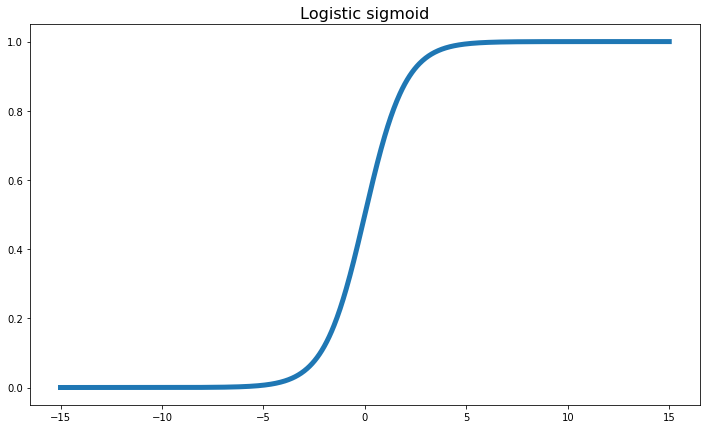

In [2]:
x = np.linspace(-15, 15, 1000)
def sigmoid(x):
    h = np.exp(x)/(np.exp(x)+1)
    return h

plt.figure(figsize=(12,7))
plt.plot(x, sigmoid(x), lw=5)
plt.title("Logistic sigmoid", fontsize=16)
plt.show()

### Hyperbolic Tangent: 
$$ f(x) = \tanh(x) $$ 
When a sigmoidal function must be used, usually is better to use hyperbolic tangent instead since it is near to linear close to zero, so by keeping the weights $W$ small we can avoid the saturation range and make the training easier.

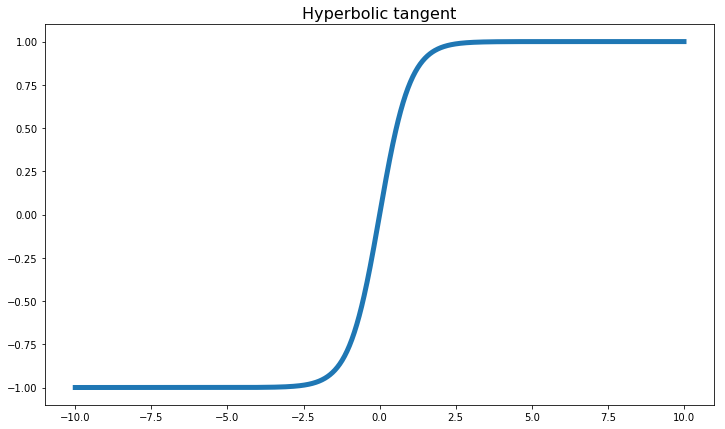

In [3]:
x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(12,7))
plt.plot(x, np.tanh(x), lw=5)
plt.title("Hyperbolic tangent", fontsize=16)
plt.show()

### Rectified Linear Units (ReLU):

$$ f(x) = \max(0, x) $$
Widely used in neural networks. The derivative of this activation function is 1 on the half of it's domain and 0 on the other half, this produce large gradients whenever the unit is active (that means, $x>0$). It is a good practice to initialize the bias $b$ as a small positive value so most of the units are active at the beginning and make the derivatives not zero for early stages of the training.

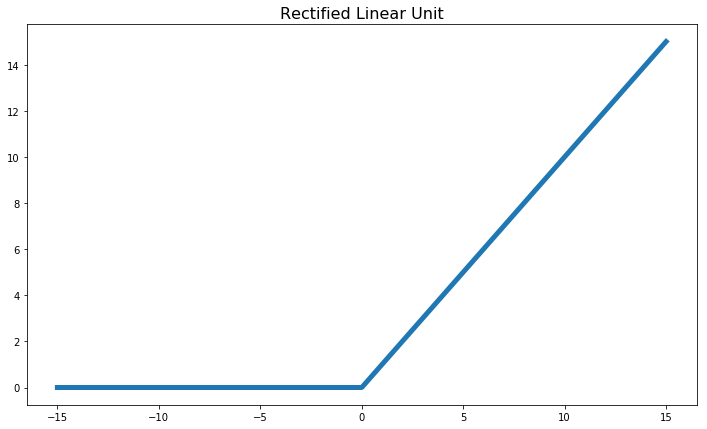

In [4]:
x = np.linspace(-15, 15, 1000)
def ReLU(x):
    h = np.amax(np.concatenate([np.zeros(shape=x.shape)[..., np.newaxis], 
                                x[..., np.newaxis]], axis=1), axis=1)
    return h

plt.figure(figsize=(12,7))
plt.plot(x, ReLU(x), lw=5)
plt.title("Rectified Linear Unit", fontsize=16)
plt.show()

### Other Hidden Units:
- Maxout units
$$ f(x)_{i} = \max(x_{j}) $$
with $j \in \mathbb{G}^{(i)}$. Generalization of ReLU.
- Radial basis function (RBF)
$$ f(x)_{i} = \exp \left ( -\frac{1}{\sigma_{i}^{2}} \| W_{i} - x \|^{2} \right ) $$
The unit becomes active when $x$ is close to $W_{i}$. It can hard to train because it saturates to 0 far from $W_{i}$
- Softplus
$$ f(x) = \log(1+e^{x}) $$
It is a smooth version of ReLU. The use of this activation is generally discouraged and it was found that better results are achieved using ReLU insted.

## Output Units and Loss Functions

### Linear units:
Just the identity over the affine transformation $y = W^{T}h + b$ where $h$ is for hidden. Often used in regression and mean square error as loss function. As 
we saw in class 3, using mean square error as loss functions is the same as minimize the likelihood assuming gaussian distribution of the data.

### Softmax Units for Multinoulli Output Distribution (or Sigmoid for Bernoulli)
$$\text{softmax}(h)_{i} = \frac{\exp(h_{i})}{\sum_{j}\exp(h_{j})}$$

It basically transform any output $h \in \mathbb{R}^{n}$ to a probability where $\sum_{j} \text{softmax}(h_{i}) = 1$. So, softmax allows us to have probabilities for every class, that is $P(y_{i} \mid x)$, then we can apply maximum likelihood estimation using softmax output as probabilities. Then, taking $-\log(P(y \mid x))$ (Negative log likelihood), we derive the cross-entropy loss function:

$$ J = -E[\log(P(y \mid x))] $$


Which can be differentiated as a function of network parameters

## Training

### Computational Graph
In order to understand how the training process works and in particular, how Tensorflow works, it is useful to introduce the concept of computational graph. The following image (6.8 of Deep Learning Book) shows examples of computational graphs. (a) $z=xy$, (b) $\hat{y} = \sigma(x^{T}w + b)$, (c) $H = \max(0, W^{T}X + b)$, (d) two operations over $w$ to compute $\hat{y} = xw$ and $\lambda \sum_{i} w_{i}^{2}$

<img src="images/graph_example.png" style="width: 500px;">

The computational graph for a two layer neural network with a regularization term in the loss function is the following (FIgure 6.11)

<img src="images/mlp_graph.png" style="width: 500px;">

### Back Propagation
Let's build a graph taking $x \in \mathbb{R}^{m}$, $y \in \mathbb{R}^{n}$, $g: \mathbb{R}^{m} \mapsto \mathbb{R}^{n}$ and $f: \mathbb{R}^{n} \mapsto \mathbb{R}$. If $z = f(y) = f(g(x))$, then the derivative (or gradient) $\partial z / \partial x_{i}$:
$$ \frac{\partial z}{\partial x_{i}} = \sum_{j} \frac{\partial z}{\partial y_{j}} \frac{\partial y_{j}}{\partial x_{i}}, \hspace{0.3cm} \text{in vector notation} \hspace{0.2cm} \nabla_{x}z = \left ( \frac{\partial y}{\partial x} \right )^{T} \nabla_{y}z$$ where $\frac{\partial y}{\partial x}$ is an $m \times n$ matrix called Jacobian of $y = g(x)$. We usually want to apply the derivative to tensors of an arbitrary number of dimensions (such as convolutional layers). In these cases the expression is exactly the same, we can index every tuple for a multi-dimensional tensor in the index i and compute the gradient in the same way. The backpropagation algorithm is basically compute the gradients for every variable that is required to learn in the graph.

### Symbol-to-Symbol Derivatives
Now, if we have our expression written as a graph, we can differentiate for every root in the graph as we know every operation derivative. This is how Theano and Tensorflow computes their gradients. Here is an example (Figure 6.10):

<img src="images/symbol_der.png" style="width: 500px;">

### Optimization Method

- Stochastic Gradiend Descent (SGD): Is an extension of the regular gradient descent, where we compute an approximate gradient using a subset of the training data called batch. It works as the following: 
Let's have a loss function $J(x, y, \theta)$ with ${x,y}$ are the data to fit and $\theta$ are the parameters of the model. Then, the approximated gradient is computed over $m$ samples of the total training set:
$$ g = \frac{1}{m} \nabla_{\theta} \sum_{i=1}^{m}L(x_{i}, y_{i}, \theta) $$
Then, we apply an update to the paramters $\theta \leftarrow \theta - \epsilon g$ where $\epsilon$ is the learning rate.

- Momentum: Similar to stochastic gradient descent, but with an additional term $v$ called velocity in the update, that produces some momentum of the moving gradient $v \leftarrow \alpha v - \epsilon g$, then $ \theta \leftarrow \theta + v$. There is an example in the following image (figure 8.5), red arrow is with momentum, black arrow is without momentum. It is clear that when we have a poor slope towards the solution or we have a very strong slope enough to skip the solution, momentum aims to solve both problems.

<img src="images/momentum.png" style="width: 500px;">

- AdaGrad: Adapts the learning rates of all model parameters by scaling them inversely proportional to the square root of the sum of all historical squared values of the gradient. It generates a movement with rapid decrease of learning rates with large derivatives and slow decrease learning rates with small derivatives. For deep neural network models, can produce an excessive and premature decrease of the learning rate. It is better to use ADAM (Adaptive Moments)!!

<img src="images/adagrad.png" style="width: 800px;">

## Regularization methods

Using regularization techniques, allows us to decrease the capacity of a model and avoid overfitting, remember that when the effective capacity of a model is too large compared with the real complexity of a problem, the model tends to memorize the training data and to overfit. 

<img src="images/regularization.png" style="width: 800px;">

### Norm penalization

We already study $L_{2}$ regularization in last class, there are also other regularization terms that we can add to the objective function like $L_{1}$ norm, that produces some empty entries (zero value for some weights) and produce a sparse weights matrix that also reduces the effective capacity of the model.

### Data Augmentation
Data augmentation is not applied on the model, it is applied to the dataset. We basically apply operation over examples of the train set and we create new examples (from the original ones) preserving the label. The model trained with augmented data will tend to be invariant to the transformations of the data (rotation for example) and it improves the robustness and accuracy over the test set since we can find similar objects in the test set as in the training set, but with some transformation for which the model is already invariant. We also have to consider transformation that keeps the samples in the same feature space!!

<img src="images/gatito.png" style="width: 800px;">

### Early Stopping
It regulates the capacity of the model by reducing the time where the optimization process is allowed to explore the solution space. It is probably the most commonly used form of regularization in neural network training, because of its effectiveness and simplicity. In the case of a simple linear model with cuadratic error function and simple gradient descent, early stopping is equivalent to $L_{2}$ regularization.

<img src="images/earlystopping.png" style="width: 600px;">

### DropOut
DropOut can be understood as training many smaller neural network models by turning off some of the neurons, to finally combine them and use the entire architecture to evaluate over the test set at the end. 

<img src="images/dropout.png" style="width: 700px;">

- In every iteration where we update the parameters of the model (the weights in the case of neural networks), we compute a random mask that defines which neurons are kept in the model for this batch update step 
- Then we turn off the corresponding neurons by making their outputs zero and apply the update. 
- Finally, at the end of the training, to evaluate the model we use all the neurons but we multiply the output by the probability of the neuron of being activated, in this way we approximate the expected output value of the network.

## Convolutional neural networks
Convolutional neural networks (CNN) are named because of the convolution operation over the data, it just replace the regular matrix multiplication in some of the layers by a convolution operation. CNN have been very very useful in practical problems, such as image recognition. Also, it is probably the greatest success story of biologically inspired artificial intelligence.

To explain the important features of CNNs we will go to a [very good class note](http://cs231n.github.io/convolutional-networks/) for a computer science class at Standford. We will just go through convolution operation and pooling.

## Other intesesting subjects
### Recurrent Neural Networks: Long Short Term Memory (LSTM) time series analysis
### Generative adversarial network (GAN): It generates new data from the original data distribution
### Autoencoders: Dimensionality reduction
### Reinforcement learning: The one used for Alpha GO
### Many other things...

# Tensorflow example

The convolutional neural network example it was taken from [this github](https://github.com/dandelionmane/tf-dev-summit-tensorboard-tutorial), and it is explained in [this youtube video](https://www.youtube.com/watch?v=eBbEDRsCmv4).

In [5]:
# Copyright 2017 Google, Inc. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
import os
import os.path
import shutil
import tensorflow as tf

LOGDIR = "/home/rodrigo/astroinformatica/auxiliares/auxiliar4/mnist_tutorial/"
LABELS = os.path.join(os.getcwd(), "labels_1024.tsv")
SPRITES = os.path.join(os.getcwd(), "sprite_1024.png")
### MNIST EMBEDDINGS ###
mnist = tf.contrib.learn.datasets.mnist.read_data_sets(train_dir=LOGDIR + "data", one_hot=True)
### Get a sprite and labels file for the embedding projector ###

if not (os.path.isfile(LABELS) and os.path.isfile(SPRITES)):
  print("Necessary data files were not found. Run this command from inside the "
    "repo provided at "
    "https://github.com/dandelionmane/tf-dev-summit-tensorboard-tutorial.")
  exit(1)

Extracting /home/rodrigo/astroinformatica/auxiliares/auxiliar4/mnist_tutorial/data/train-images-idx3-ubyte.gz
Extracting /home/rodrigo/astroinformatica/auxiliares/auxiliar4/mnist_tutorial/data/train-labels-idx1-ubyte.gz
Extracting /home/rodrigo/astroinformatica/auxiliares/auxiliar4/mnist_tutorial/data/t10k-images-idx3-ubyte.gz
Extracting /home/rodrigo/astroinformatica/auxiliares/auxiliar4/mnist_tutorial/data/t10k-labels-idx1-ubyte.gz


## Defining layers

In [6]:
def conv_layer(input, size_in, size_out, name="conv"):
    # Put every variable in the graph in a subgroup called "conv"
    with tf.name_scope(name):
        # Tensor of convolutional layer (look at the shape!!)
        w = tf.Variable(tf.truncated_normal([5, 5, size_in, size_out], stddev=0.1), name="W")
        # Biases
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
        # Convolution operation
        conv = tf.nn.conv2d(input, w, strides=[1, 1, 1, 1], padding="SAME")
        # Rectified linear function as activation
        act = tf.nn.relu(conv + b)
        # Summary in a form of histogram
        # This allows us to see these variables during training using tensorboard
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        tf.summary.histogram("activations", act)
        # Pooling (2 x 2) layer at the end
        return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")


def fc_layer(input, size_in, size_out, name="fc"):
    # Put every variable in the graph in a subgroup called "fc" (fully connected layer)
    with tf.name_scope(name):
        w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=0.1), name="W")
        b = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
        act = tf.matmul(input, w) + b
        tf.summary.histogram("weights", w)
        tf.summary.histogram("biases", b)
        tf.summary.histogram("activations", act)
        return act

## Building convolutional neural network

In [7]:
def mnist_model(learning_rate, use_two_fc, use_two_conv, hparam):
    tf.reset_default_graph() # We start from a blank graph
    # A tensorflow session is where everything happend
    # It is important to notice that every operation in the graph
    # must be defined using Tensorflow operators
    sess = tf.Session() 

    # Setup placeholders, and reshape the data
    # Place holders are your inputs to the graph, in this case
    # are the digit images and the labels
    x = tf.placeholder(tf.float32, shape=[None, 784], name="x")
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    # Image summary to visualize in tensorboard
    tf.summary.image('input', x_image, 3)
    # Placeholder for labels
    y = tf.placeholder(tf.float32, shape=[None, 10], name="labels")

    # Conecting graph of convolutional layers
    if use_two_conv:
        conv1 = conv_layer(x_image, 1, 32, "conv1")
        # Output of the first layer as the input of the second one
        conv_out = conv_layer(conv1, 32, 64, "conv2")
    else:
        conv1 = conv_layer(x_image, 1, 64, "conv")
        conv_out = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")

    # The output data from a convolution is a tensor, to make it
    # as fully connected input we need the data to be flatten
    flattened = tf.reshape(conv_out, [-1, 7 * 7 * 64])

    # Number of fully connected layers
    if use_two_fc:
        fc1 = fc_layer(flattened, 7 * 7 * 64, 1024, "fc1")
        relu = tf.nn.relu(fc1)
        embedding_input = relu
        # Saving activation as histogram for tensorboard
        tf.summary.histogram("fc1/relu", relu)
        embedding_size = 1024
        logits = fc_layer(fc1, 1024, 10, "fc2")
    else:
        embedding_input = flattened
        embedding_size = 7*7*64
        logits = fc_layer(flattened, 7*7*64, 10, "fc")
        
    ############# Loss function and training parameters #################33
    
    # Cross-entropy function
    with tf.name_scope("xent"):
        xent = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
            logits=logits, labels=y), name="xent")
        xent_sum = tf.summary.scalar("xent", xent)

    # We use Adam as optimizer
    with tf.name_scope("train"):
        train_step = tf.train.AdamOptimizer()
        train_all_params = train_step.minimize(xent)
        
    # Performance metric for monitoring using tensorboard
    with tf.name_scope("accuracy"):
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        acc_sum = tf.summary.scalar("accuracy", accuracy)

    # This add every summary to save
    summ = tf.summary.merge_all()
    test_summ = tf.summary.merge([acc_sum, xent_sum])
    
    embedding = tf.Variable(tf.zeros([1024, embedding_size]), name="test_embedding")
    assignment = embedding.assign(embedding_input)
    saver = tf.train.Saver()

    sess.run(tf.global_variables_initializer())
    # A writer is what we use to save the state of the training process
    # on a given moment
    writer = tf.summary.FileWriter(LOGDIR + hparam)
    writer.add_graph(sess.graph)
    writer2 = tf.summary.FileWriter(LOGDIR + hparam + "/test")
    
    config = tf.contrib.tensorboard.plugins.projector.ProjectorConfig()
    embedding_config = config.embeddings.add()
    embedding_config.tensor_name = embedding.name
    embedding_config.sprite.image_path = SPRITES
    embedding_config.metadata_path = LABELS
    # Specify the width and height of a single thumbnail.
    embedding_config.sprite.single_image_dim.extend([28, 28])
    tf.contrib.tensorboard.plugins.projector.visualize_embeddings(writer, config)

    for i in range(1001):
        # batch of size 100
        print("iteration "+str(i)+" of 1000", end="\r")
        batch = mnist.train.next_batch(100)
        test_batch = mnist.test.next_batch(100)
        if i == 0:
            print("input shape "+str(batch[0].shape))
            print("label shape "+str(batch[1].shape))
        if i % 5 == 0:
            # sess.run feeds the graph with "feed_dict" and computes the values for every
            # node, then returns the operation requested (accuracy in this case) and a
            # summary object to save and visualize
            [train_accuracy, s] = sess.run([accuracy, summ], feed_dict={x: batch[0], y: batch[1]})
            # Save summaries every 5 iterations
            writer.add_summary(s, i)
            [test_accuracy, s2] = sess.run([accuracy, test_summ], 
                                          feed_dict={x: test_batch[0], y: test_batch[1]})
            writer2.add_summary(s2, i)
        if i % 1000 == 0:
            # Save model every 200 iterations
            sess.run(assignment, feed_dict={x: mnist.test.images[:1024], y: mnist.test.labels[:1024]})
            saver.save(sess, os.path.join(LOGDIR, "model.ckpt"), i)
        # feed the graph and do one train step
        sess.run(train_all_params, feed_dict={x: batch[0], y: batch[1]})

In [8]:
# Convert parameters to string to save in different logdirs for tensorboard
def make_hparam_string(learning_rate, use_two_fc, use_two_conv):
    conv_param = "conv=2" if use_two_conv else "conv=1"
    fc_param = "fc=2" if use_two_fc else "fc=1"
    return "conv_param_"+str(conv_param)+"_fc_param_"+str(fc_param)
    #return "lr_%.0E,%s,%s" % (learning_rate, conv_param, fc_param)

In [9]:
print('Now run')
print('tensorboard --logdir=%s' % LOGDIR)
print("to see the results")
# Include "False" as a value to try different model architectures
learning_rate = 0 # We are not using learning rate here, is just to make it faster
for use_two_fc in [True]:
    for use_two_conv in [False, True]:
        # Construct a hyperparameter string for each one (example: "lr_1E-3,fc=2,conv=2")
        hparam = make_hparam_string(learning_rate, use_two_fc, use_two_conv)
        print('Starting run for %s' % hparam)
        # Actually run with the new settings
        mnist_model(learning_rate, use_two_fc, use_two_conv, hparam)

Now run
tensorboard --logdir=/home/rodrigo/astroinformatica/auxiliares/auxiliar4/mnist_tutorial/
to see the results
Starting run for conv_param_conv=1_fc_param_fc=2
input shape (100, 784)
label shape (100, 10)
Starting run for conv_param_conv=2_fc_param_fc=2
input shape (100, 784)
label shape (100, 10)
